In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2

In [2]:
key_pts_frame = pd.read_csv('data/training_frames_keypoints.csv')

In [3]:
key_pts_frame.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,126,127,128,129,130,131,132,133,134,135
0,Luis_Fonsi_21.jpg,45.0,98.0,47.0,106.0,49.0,110.0,53.0,119.0,56.0,...,83.0,119.0,90.0,117.0,83.0,119.0,81.0,122.0,77.0,122.0
1,Lincoln_Chafee_52.jpg,41.0,83.0,43.0,91.0,45.0,100.0,47.0,108.0,51.0,...,85.0,122.0,94.0,120.0,85.0,122.0,83.0,122.0,79.0,122.0
2,Valerie_Harper_30.jpg,56.0,69.0,56.0,77.0,56.0,86.0,56.0,94.0,58.0,...,79.0,105.0,86.0,108.0,77.0,105.0,75.0,105.0,73.0,105.0
3,Angelo_Reyes_22.jpg,61.0,80.0,58.0,95.0,58.0,108.0,58.0,120.0,58.0,...,98.0,136.0,107.0,139.0,95.0,139.0,91.0,139.0,85.0,136.0
4,Kristen_Breitweiser_11.jpg,58.0,94.0,58.0,104.0,60.0,113.0,62.0,121.0,67.0,...,92.0,117.0,103.0,118.0,92.0,120.0,88.0,122.0,84.0,122.0


In [5]:
n = 0
image_name = key_pts_frame.iloc[n, 0]
key_pts = key_pts_frame.iloc[n, 1:].values
key_pts = key_pts.astype('float').reshape(-1, 2)

print('Image name: ', image_name)
print('Landmarks shape: ', key_pts.shape)
print('First 4 key pts: {}'.format(key_pts[:4]))

Image name:  Luis_Fonsi_21.jpg
Landmarks shape:  (68, 2)
First 4 key pts: [[ 45.  98.]
 [ 47. 106.]
 [ 49. 110.]
 [ 53. 119.]]


In [8]:
def show_keypoints(image, key_pts):
    """Show image with keypoints"""
    plt.imshow(image)
    plt.scatter(key_pts[:, 0], key_pts[:, 1], s=20, marker='.', c='m')

In [9]:
image_name

'Luis_Fonsi_21.jpg'

In [12]:
from pathlib import Path
img_path  = Path(f'data/training/{image_name}')
img_path

PosixPath('data/training/Luis_Fonsi_21.jpg')

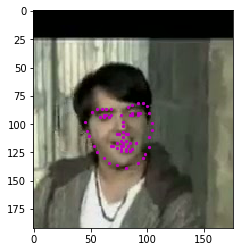

In [16]:
show_keypoints(mpimg.imread(img_path),key_pts)

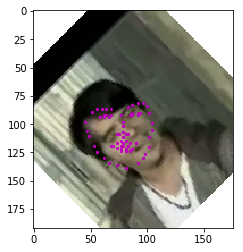

In [25]:
from PIL import Image
im = Image.open(f'data/training/{image_name}')
im_rotate = im.rotate(45)
show_keypoints(im_rotate,key_pts)

In [26]:
type(im)

PIL.PngImagePlugin.PngImageFile

In [29]:
im.getbbox()

(0, 0, 176, 192)

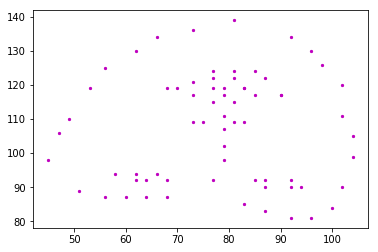

In [40]:

plt.scatter(key_pts[:, 0], key_pts[:, -1], s=20, marker='.', c='m')
plt.show()

In [47]:
im_t = im.transpose(Image.ROTATE_90)
key_pts_180 = np.rot90(key_pts)
key_pts_180.shape
#plt.imshow(im_t)
#plt.scatter(key_pts_180[:, 0], key_pts[:, 1], s=20, marker='.', c='m')
#plt.show()

(2, 68)

In [63]:
image = mpimg.imread(f'data/training/{image_name}')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_gray_2 = cv2.cvtColor(image_gray,cv2.COLOR_RGB2GRAY)

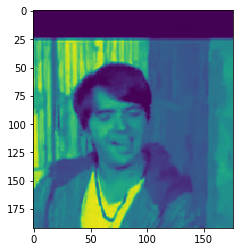

In [64]:
plt.imshow(image_gray_2)

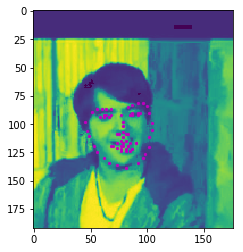

In [66]:
image_histogram_stretch = cv2.equalizeHist(image_gray_2)
plt.imshow(image_histogram_stretch)
plt.scatter(key_pts[:, 0], key_pts[:, 1], s=20, marker='.', c='m')

In [67]:
class HistogramStretch:
    def __call__(self,sample):
        image, key_pts = sample['image'], sample['keypoints']
        
        image_copy = np.copy(image)
        key_pts_copy = np.copy(key_pts)
        
        image_copy = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
        image_hist = cv2.equalizeHist(image_copy)
        
        return {'image': image_hist, 'keypoints': key_pts_copy}
        